<a href="https://colab.research.google.com/github/MarkLee7925/Heart-Classification-UCI/blob/main/heart_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Heart Disease In Patient

## Data pre-processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [2]:
# Load dataframe (df)
df = pd.read_csv('heart.csv')
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(303, 13) (303,)


In [3]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [7]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Visualize data

#### Plot age distribution

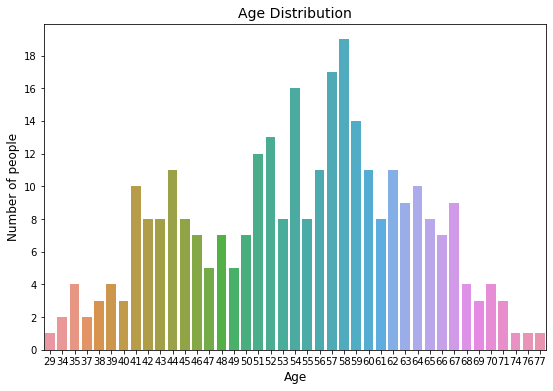

In [8]:
plt.figure(figsize=(9, 6))
plt.yticks(np.arange(0, 20, 2))
age_dist = df['age']
sns.countplot(x=age_dist)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

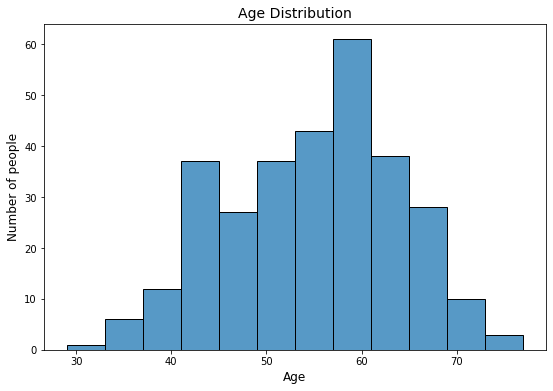

In [9]:
plt.figure(figsize=(9, 6))
age_dist = df['age']
sns.histplot(x=age_dist)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.show()

#### Plot gender distribution

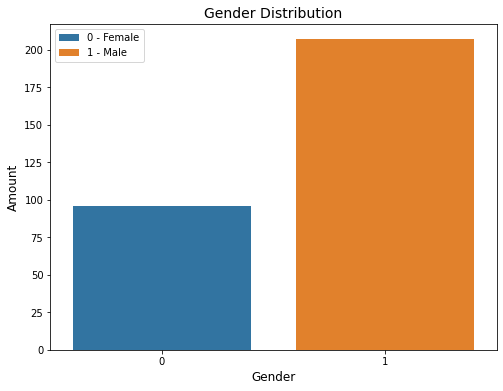

In [10]:
plt.figure(figsize=(8, 6))
labels = ['0 - Female', '1 - Male']
gender_dist = df['sex']
gender_plot = sns.countplot(x=gender_dist, hue=df['sex'], dodge=False)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
plt.legend(labels=labels, loc='upper left')
plt.show()

#### Gender distribution and Results

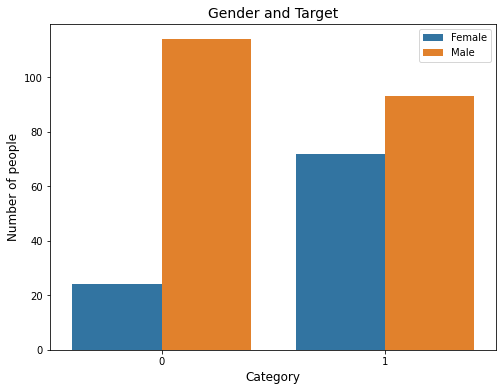

In [11]:
labels = ['Female', 'Male']
plt.figure(figsize=(8, 6))
target = df['target']
sns.countplot(x=target, hue=df['sex'])
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Gender and Target', fontsize=14)
plt.legend(labels=labels)
plt.show()

###### **Category:**
0 - No Heart Disease\
1 - Heart Disease

#### Chest Pain Type and Cholesterol Level

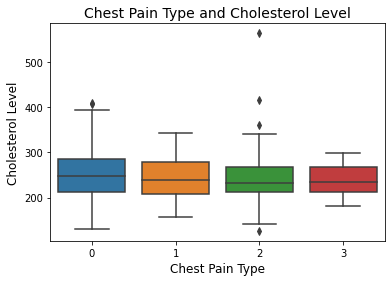

In [12]:
x = df['cp']
y = df['chol']
labels = ['0 - Nontypical', '1 - Nonanginal', '2 - Asymptomatic', '3 - Typical']
box_plot = sns.boxplot(x=x, y=y, data=df)
box_plot.set_xlabel("Chest Pain Type", fontsize=12)
box_plot.set_ylabel("Cholesterol Level", fontsize=12)
box_plot.set_title("Chest Pain Type and Cholesterol Level", fontsize=14)
plt.show()

###### **Types of Chest Pain:**
0 - Nontypical\
1 - Nonanginal\
2 - Asymptomatic\
3 - Typical

#### Chest pain and heart rate

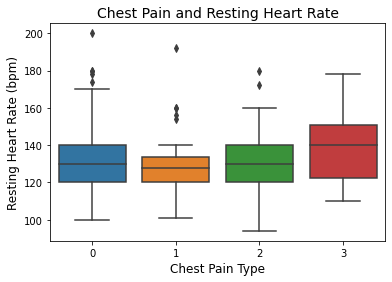

In [13]:
x = df['cp']
y = df['trestbps']
labels = ['0 - Nontypical', '1 - Nonanginal', '2 - Asymptomatic', '3 - Typical']
box_plot = sns.boxplot(x=x, y=y, data=df)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Resting Heart Rate (bpm)", fontsize=12)
plt.title("Chest Pain and Resting Heart Rate", fontsize=14)
plt.show()

###### **Types of Chest Pain:**
0 - Nontypical\
1 - Nonanginal\
2 - Asymptomatic\
3 - Typical

#### Age vs Cholesterol Level

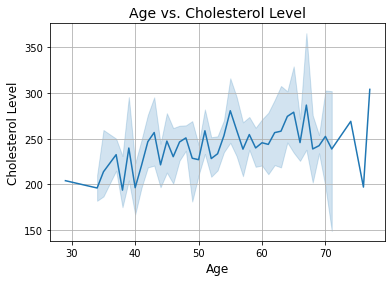

In [14]:
x = df['age']
y = df['chol']
line_plot = sns.lineplot(x=x, y=y, data=df)
line_plot.set_xlabel("Age", fontsize=12)
line_plot.set_ylabel("Cholesterol Level", fontsize=12)
line_plot.set_title("Age vs. Cholesterol Level", fontsize=14)
plt.grid()
plt.show()

#### Age vs. Blood Sugar

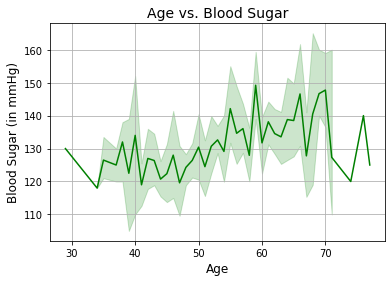

In [15]:
x = df['age']
y = df['trestbps']
line_plot = sns.lineplot(x=x, y=y, data=df, color='green')
line_plot.set_xlabel("Age", fontsize=12)
line_plot.set_ylabel("Blood Sugar (in mmHg)", fontsize=12)
line_plot.set_title("Age vs. Blood Sugar", fontsize=14)
plt.grid()
plt.show()

## Define DNN model

Batch size = 32, Epochs = 150, k-Folds = 3
Epoch 1/150


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


8/8 [==============================] - 1s 66ms/step - loss: 0.9199 - accuracy: 0.4449 - val_loss: 0.8090 - val_accuracy: 0.4426
Epoch 2/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8550 - accuracy: 0.4798 - val_loss: 0.7808 - val_accuracy: 0.4262
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8563 - accuracy: 0.4350 - val_loss: 0.7543 - val_accuracy: 0.4590
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 0.8189 - accuracy: 0.4320 - val_loss: 0.7331 - val_accuracy: 0.4590
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7552 - accuracy: 0.5178 - val_loss: 0.7167 - val_accuracy: 0.4754
Epoch 6/150
8/8 [==============================] - 0s 8ms/step - loss: 0.7229 - accuracy: 0.5491 - val_loss: 0.7033 - val_accuracy: 0.4918
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.7389 - accuracy: 0.5128 - val_loss: 0.6918 - val_accuracy: 0.5082
Epoch 8/150
8/8 [=====================

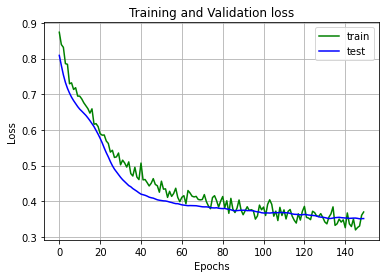

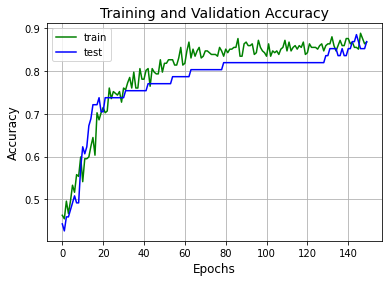

accuracy: 86.885%
Epoch 1/150
8/8 [==============================] - 1s 44ms/step - loss: 0.6274 - accuracy: 0.6369 - val_loss: 0.6088 - val_accuracy: 0.6066
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6434 - accuracy: 0.6415 - val_loss: 0.5960 - val_accuracy: 0.6557
Epoch 3/150
8/8 [==============================] - 0s 20ms/step - loss: 0.6383 - accuracy: 0.6528 - val_loss: 0.5852 - val_accuracy: 0.6721
Epoch 4/150
8/8 [==============================] - 0s 13ms/step - loss: 0.6163 - accuracy: 0.6719 - val_loss: 0.5746 - val_accuracy: 0.7377
Epoch 5/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6099 - accuracy: 0.6703 - val_loss: 0.5650 - val_accuracy: 0.7213
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6418 - accuracy: 0.6134 - val_loss: 0.5553 - val_accuracy: 0.7213
Epoch 7/150
8/8 [==============================] - 0s 10ms/step - loss: 0.5413 - accuracy: 0.7770 - val_loss: 0.5459 - val_accuracy: 0.7213
Epo

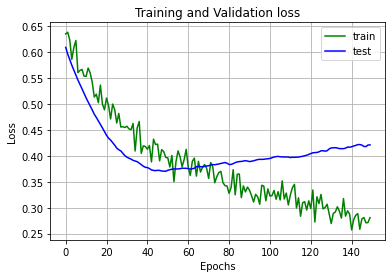

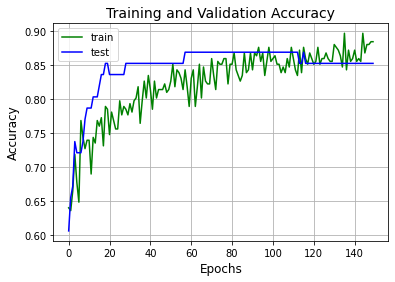

accuracy: 85.246%
Epoch 1/150
8/8 [==============================] - 1s 43ms/step - loss: 0.7136 - accuracy: 0.5576 - val_loss: 0.6864 - val_accuracy: 0.5246
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 0.7218 - accuracy: 0.4884 - val_loss: 0.6691 - val_accuracy: 0.5082
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 0.6831 - accuracy: 0.5696 - val_loss: 0.6532 - val_accuracy: 0.5246
Epoch 4/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6499 - accuracy: 0.6069 - val_loss: 0.6397 - val_accuracy: 0.5738
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6210 - accuracy: 0.6062 - val_loss: 0.6269 - val_accuracy: 0.5902
Epoch 6/150
8/8 [==============================] - 0s 10ms/step - loss: 0.6120 - accuracy: 0.6728 - val_loss: 0.6153 - val_accuracy: 0.6885
Epoch 7/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6106 - accuracy: 0.6496 - val_loss: 0.6060 - val_accuracy: 0.7049
Epoc

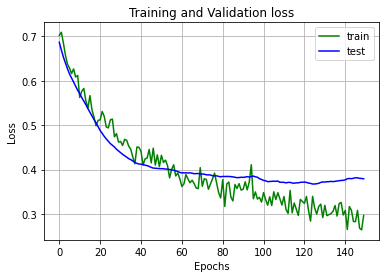

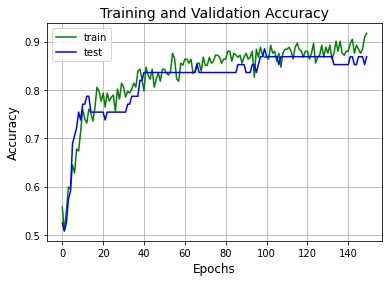

accuracy: 86.885%
Mean Accuracy: 86.339%
Standard Deviation: 0.773%
Losses:
[35.17318367958069, 42.09863245487213, 37.935858964920044]
Scores:
[86.8852436542511, 85.24590134620667, 86.8852436542511]


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

cv_scores = []  # Scores for each k-Fold
losses = []  # Losses for each k-Fold
def create_model(batch_size, epochs, folds, neurons, dropout_rate):  
  """ Define DL model with specified parameters """
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  print("Batch size = %d, Epochs = %d, k-Folds = %d" % (batch_size, epochs, folds))
  for train, test in kfold.split(X, y):
   
    # Define Deep Learning model
    model = Sequential()
    # Input layer and Hidden Layer 1
    model.add(Dense(units=neurons[0], input_dim=13, activation='relu'))
    # model.add(Dropout(rate=dropout_rate))
    # Hidden Layer 2
    model.add(Dense(units=neurons[1],activation='relu'))
    # Dropout layer
    model.add(Dropout(rate=dropout_rate))
    # Output layer
    model.add(Dense(units=1,activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    # Train model
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

    # Plot loss during training
    plt.plot(history.history['loss'], 'g', label='train')
    plt.plot(history.history['val_loss'], 'b', label='test')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot accuracy during training
    plt.plot(history.history['accuracy'], 'g', label='train')
    plt.plot(history.history['val_accuracy'], 'b', label='test')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Training and Validation Accuracy', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

    # Print scores
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("%s: %.3f%%" % (model.metrics_names[1], scores[1]*100))
    losses.append(scores[0] * 100)  # Loss percentage
    cv_scores.append(scores[1] * 100)  # Score percentage
  return model

# With one dropout layer (optimal results from Random Search)
# {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 6), 
# 'dropout_rate': 0.4}
model = create_model(32, 150, 3, (14, 6), 0.4)

# With two dropout layers (results in too much underfitting)
# {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 8), 
# 'dropout_rate': 0.45}
# model = create_model(32, 150, 3, (14, 8), 0.45)

# Print results
print("Mean Accuracy: %.3f%%" % np.mean(cv_scores))
print("Standard Deviation: %.3f%%" % np.std(cv_scores))
print('Losses:')
print(losses)
print('Scores:')
print(cv_scores)

#### Sample Results:

##### Using one dropout layer (optimal results from Random Search):
**Parameters:** {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 6), 'dropout_rate': 0.4}

<table border = "1">
  <thead>
    <th colspan = "5">With one dropout layer</th>
  </thead>
  <tbody>
    <tr>
      <th>Trial</th>
      <th>Mean (%)</th>
      <th>Std. (+/- %)</th>
      <th>Losses (%)</th>
      <th>Scores (%)</th>
    </tr>
    <tr>
      <td><b>1</b></td>
      <td>85.792</td>
      <td>1.546</td>
      <td>[40.784, 36.420, 37.566]</td>
      <td>[83.607, 86.885, 86.885]</td>
    </tr>
    <tr>
      <td><b>2</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[34.234, 38.973, 37.645]</td>
      <td>[88.525, 86.885, 83.607]</td>
    </tr>
    <tr>
      <td><b>3</b></td>
      <td>84.153</td>
      <td>2.045</td>
      <td>[39.444, 36.632, 39.889]</td>
      <td>[81.967, 86.885, 83.607]</td>
    </tr>
    <tr>
      <td><b>4</b></td>
      <td>88.525</td>
      <td>1.339</td>
      <td>[38.665, 30.301, 35.466]</td>
      <td>[86.885, 90.164, 88.525]</td>
    </tr>
    <tr>
      <td><b>5</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[34.047, 35.591, 39.353]</td>
      <td>[88.525, 83.607, 86.885]</td>
    </tr>
    <tr>
      <th>Average:</th>
      <td><b>86.230<b></td>
      <td><b>1.804</b></td>
    </tr>
  </tbody>
</table>

##### With two dropout layers (results in too much underfitting)
**Parameters:** {'batch_size': 32, 'epochs': 150, 'folds': 3, 'neurons': (14, 8), 'dropout_rate': 0.45}

<table border = "1">
  <thead>
    <th colspan = "5">With two dropout layers</th>
  </thead>
  <tbody>
    <tr>
      <th>Trial</th>
      <th>Mean (%)</th>
      <th>Std. (+/- %)</th>
      <th>Losses (%)</th>
      <th>Scores (%)</th>
    </tr>
    <tr>
      <td><b>1</b></td>
      <td>86.339</td>
      <td>2.045</td>
      <td>[36.204, 33.903, 37.372]</td>
      <td>[86.885, 83.607, 88.525]</td>
    </tr>
    <tr>
      <td><b>2</b></td>
      <td>84.699</td>
      <td>2.045</td>
      <td>[37.547, 36.046, 32.915]</td>
      <td>[81.967, 85.246, 86.885]</td>
    </tr>
    <tr>
      <td><b>3</b></td>
      <td>83.607</td>
      <td>1.339</td>
      <td>[40.159, 36.067, 40.181]</td>
      <td>[83.607, 85.246, 81.967]</td>
    </tr>
    <tr>
      <td><b>4</b></td>
      <td>84.153</td>
      <td>2.045</td>
      <td>[36.800, 38.977, 37.290]</td>
      <td>[83.607, 86.885, 81.967]</td>
    </tr>
    <tr>
      <td><b>5</b></td>
      <td>85.246</td>
      <td>2.677</td>
      <td>[35.594, 41.179, 37.873]</td>
      <td>[85.246, 81.967, 88.525]</td>
    </tr>
    <tr>
      <th>Average:</th>
      <td><b>85.409</b></td>
      <td><b>2.030</b></td>
    </tr>
  </tbody>
</table>

##### NOTE: These results vary between trials.

## Evaluate model

In [17]:
# Predict test set results
y_pred = model.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))

[[3.17e-03 0.00e+00]
 [5.99e-01 1.00e+00]
 [6.38e-01 0.00e+00]
 [1.09e-03 0.00e+00]
 [8.56e-02 1.00e+00]
 [1.28e-01 0.00e+00]
 [1.04e-01 0.00e+00]
 [1.48e-02 0.00e+00]
 [1.69e-06 0.00e+00]
 [4.83e-04 0.00e+00]
 [7.28e-01 1.00e+00]
 [9.88e-01 1.00e+00]
 [2.25e-03 0.00e+00]
 [8.80e-01 1.00e+00]
 [9.78e-01 1.00e+00]
 [7.67e-01 1.00e+00]
 [8.75e-03 1.00e+00]
 [8.53e-01 1.00e+00]
 [2.44e-03 0.00e+00]
 [5.83e-01 1.00e+00]
 [9.07e-01 1.00e+00]
 [2.63e-01 0.00e+00]
 [2.13e-01 0.00e+00]
 [3.81e-01 0.00e+00]
 [8.59e-01 1.00e+00]
 [7.09e-01 0.00e+00]
 [4.82e-02 0.00e+00]
 [1.44e-01 0.00e+00]
 [9.88e-01 1.00e+00]
 [7.43e-01 1.00e+00]
 [6.55e-01 0.00e+00]
 [7.81e-04 0.00e+00]
 [9.91e-01 1.00e+00]
 [7.99e-01 1.00e+00]
 [9.44e-01 1.00e+00]
 [5.05e-01 0.00e+00]
 [6.85e-03 0.00e+00]
 [8.38e-01 1.00e+00]
 [5.31e-02 0.00e+00]
 [1.40e-03 0.00e+00]
 [8.26e-01 1.00e+00]
 [9.37e-01 1.00e+00]
 [4.34e-01 1.00e+00]
 [1.72e-01 0.00e+00]
 [6.24e-01 1.00e+00]
 [5.91e-01 1.00e+00]
 [8.99e-01 1.00e+00]
 [4.97e-01 0.

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))

# Create the confusion matrix
# TN = cm[0][0]  # True Negative
# FP = cm[0][1]  # False Positive
# FN = cm[1][0]  # False Negative
# TP = cm[1][1]  # True Positive
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred) * 100)
print("Test Accuracy: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of occurrences of each class in y_pred
print(classification_report(y_test, y_pred))


[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]
[[22  5]
 [ 3 31]]
86.88524590163934
Test Accuracy: 86.885% 
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Apply Random Search for parameter tuning
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV

# Initialize Keras Classifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Initialize parameters
# Min 2 splits, max 6 splits
# param_dict = {'batch_size': [16, 32],
#                'epochs': [100, 150],
#                'folds': [3, 4, 5],
#               'neurons': [(14, 6), (14, 8), (16, 6), (16, 8)],
#               'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

param_dict = {'batch_size': [32],
              'epochs': [150],
              'folds': [3],
              'neurons': [(14, 6), (14, 8)],
              'dropout_rate': [0.4]}

# Initialize scoring method
scoring_dict = {'accuracy_score': make_scorer(accuracy_score),
           'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score)}

# Initialize RandomizedSearchCV object
rand = RandomizedSearchCV(estimator=model,
                          param_distributions=param_dict,
                          scoring=scoring_dict,
                          refit='accuracy_score')
rand_result = rand.fit(X_train, y_train)

# Show the results
print("Best Score: %.3f%%" % (rand_result.best_score_ * 100))
print("Best Parameters: %s" % rand_result.best_params_)


#### -- Random Search Results --

##### param_dict = {'batch_size': [16], 'epochs': [100], 'folds': [3, 4], 'neurons': [6, 8]}

Best Score: 77.7541%\
Best Parameters: {'neurons': 8, 'folds': 3, 'epochs': 100, 'batch_size': 16}

*Search time: Approx. 15 minutes

##### param_dict = {'batch_size': [16, 32], 'epochs': [150], 'folds': [3, 4], 'neurons': [10, 12]}

Best Score: 80.820%\
Best Parameters: {'neurons': 12, 'folds': 4, 'epochs': 150, 'batch_size': 32}

*Search time: Approx. 1.25 hours

##### param_dict = {'batch_size': [16, 32], 'epochs': [100, 150], 'folds': [3, 4, 5], 'neurons': [4, 6, 8, 10, 12]}
Best Score: 85.4372%\
Best Parameters: {'neurons': 12, 'folds': 3, 'epochs': 150, 'batch_size': 16}

*Search time: At least 1.5 hours

##### param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4, 5], 'neurons': [12], 'dropout_rate': [0.05, 0.1, 0.15]}
Best Score: 85.578%\
Best Parameters: {'neurons': 12, 'folds': 3, 'epochs': 150, 'dropout_rate': 0.05, 'batch_size': 32}

*Search time: At least 1.5 hours

##### param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3], 'neurons': [12], 'dropout_rate': [0.04, 0.05, 0.06]}
Best Score: 86.378%\
Best Parameters: {'neurons': 12, 'folds': 3, 'epochs': 150, 'dropout_rate': 0.05, 'batch_size': 32}

*Search time: Approx. 15 minutes

##### **With one Dropout layer:**

param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4],  'neurons': [(14, 6), (14, 8), (16, 6), (16, 8)], 'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

- Best Score: 86.412%\
Best Parameters: {'neurons': (14, 8), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 32}

- Best Score: 87.645%\
Best Parameters: {'neurons': (14, 6), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 32}

*Search time: Approx. 1.25 hours

##### **With two Dropout layers:**

param_dict = param_dict = {'batch_size': [32], 'epochs': [150], 'folds': [3, 4], 'neurons': [(14, 6), (14, 8)], 'dropout_rate': [0.3, 0.4, 0.5]}

Best Score: 85.978%\
Best Parameters: {'neurons': (14, 8), 'folds': 3, 'epochs': 150, 'dropout_rate': 0.5, 'batch_size': 32}

*Search time: Approx. 1.5 hours